# Zadanie nr 2 - Trie i drzewa sufiksów

In [1]:
#!pip install treelib
from treelib import Tree

In [2]:
from time import time
import matplotlib.pyplot as plt

1. Przyjmij następujący zbiór danych wejściowych:
>* bbbd
>* aabbabd
>* ababcd
>* abcbccd
>* załączony plik.

In [271]:
test_data = ['bbbd', 'aabbabd', 'ababcd', 'abcabccd']

with open('1997_714_head.txt', 'r') as file:
    text = "".join(file)
    test_data.append(text)

2. Upewnij się, że każdy łańcuch na końcu posiada unikalny znak (marker), a jeśli go nie ma, to dodaj ten znak.

In [52]:
def unique_last_character(text):
    is_unique = text[-1] not in text[:-1]
    
    if is_unique:
        return text
    
    for i in range(36, 1000):
        if chr(i) not in text:
            return text + chr(i)

In [53]:
print("abc ->", unique_last_character("abc"))
print("abb ->", unique_last_character("abb"))

abc -> abc
abb -> abb$


3. Zaimplementuj algorytm konstruujący strukturę trie, która przechowuje wszystkie sufiksy łańcucha danego na wejściu.

In [54]:
class TrieNode:
    def __init__(self, char):
        self.char = char
        self.children = {}

    def __str__(self):
        return self.char

    def __lt__(self, other):
        return self.char < other.char

In [55]:
def build_trie(text):
    text = unique_last_character(text)
    head = TrieNode("")

    for suffix_index in range(len(text)):
        current_node = head
        for char_index, char in enumerate(text[suffix_index:]):
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                for k, char in enumerate(text[suffix_index+char_index:]):
                    new_node = TrieNode(char)
                    current_node.children[char] = new_node
                    current_node = new_node
                break
                
    return head

In [56]:
def show_trie(text):
    tree = Tree()
    head = build_trie(text)
    tree.create_node(head, head, parent=None)

    def create_tree(node):
        for child in node.children.values():
            tree.create_node(child, child, parent=node)
            create_tree(child)

    create_tree(head)
    print("trie for the word: ", unique_last_character(text))
    tree.show()

In [57]:
show_trie(test_data[0])

trie for the word:  bbbd

├── b
│   ├── b
│   │   ├── b
│   │   │   └── d
│   │   └── d
│   └── d
└── d



In [58]:
show_trie(test_data[1])

trie for the word:  aabbabd

├── a
│   ├── a
│   │   └── b
│   │       └── b
│   │           └── a
│   │               └── b
│   │                   └── d
│   └── b
│       ├── b
│       │   └── a
│       │       └── b
│       │           └── d
│       └── d
├── b
│   ├── a
│   │   └── b
│   │       └── d
│   ├── b
│   │   └── a
│   │       └── b
│   │           └── d
│   └── d
└── d



In [59]:
show_trie(test_data[2])

trie for the word:  ababcd

├── a
│   └── b
│       ├── a
│       │   └── b
│       │       └── c
│       │           └── d
│       └── c
│           └── d
├── b
│   ├── a
│   │   └── b
│   │       └── c
│   │           └── d
│   └── c
│       └── d
├── c
│   └── d
└── d



In [60]:
show_trie(test_data[3])

trie for the word:  abcabccd

├── a
│   └── b
│       └── c
│           ├── a
│           │   └── b
│           │       └── c
│           │           └── c
│           │               └── d
│           └── c
│               └── d
├── b
│   └── c
│       ├── a
│       │   └── b
│       │       └── c
│       │           └── c
│       │               └── d
│       └── c
│           └── d
├── c
│   ├── a
│   │   └── b
│   │       └── c
│   │           └── c
│   │               └── d
│   ├── c
│   │   └── d
│   └── d
└── d



4. Zaimplementuj algorytm konstruujący drzewo sufiksów.
Upewnij się, że powstałe struktury danych są poprawne. Możesz np. sprawdzić, czy struktura zawiera jakiś ciąg znaków i porównać wyniki z algorytmem wyszukiwania wzorców.


In [280]:
class TreeNode:
    def __init__(self, range):
        self.range = range
        self.children = set()

    def __str__(self):
        str = ""
        if self.range[0] < 0:
            return ""
        for i in range(self.range[0], self.range[1]+1):
            str += TreeNode.text[i]
        return str

    def __repr__(self):
        return str(self)

    def __lt__(self, other):
        return str(self) < str(other)

In [281]:
def build_tree(text):
    text = unique_last_character(text)
    head = TreeNode(range=(0, -1))

    for suffix_index in range(len(text)):
        current_node = head
        current_index = suffix_index
        found = 0
        while current_index < len(text) and not found:
            skip = 0
            for child in current_node.children:
                common = 0

                for k in range(child.range[0], child.range[1]+1):
                    if text[current_index+common] == text[k]:
                        common += 1
                    else:
                        break

                if common == child.range[1] - child.range[0] + 1:
                    current_node = child
                    current_index += common
                    skip = 1
                    break

                elif common > 0:
                    new_child_1 = TreeNode(
                        range=(child.range[0]+common, child.range[1]))
                    new_child_2 = TreeNode(
                        range=(current_index+common, len(text)-1))

                    new_child_1.children = child.children

                    child.range = (
                        child.range[0], child.range[0]+common-1)
                    child.children = {new_child_1, new_child_2}
                    found = 1
                    break

            if not found and not skip:
                new_child = TreeNode(range=(current_index, len(text)-1))
                current_node.children.add(new_child)
                break

    return head

In [282]:
def show_tree(text, head=None):   
    TreeNode.text = unique_last_character(text)
    if head is None:
        head = build_tree(text)
        
    tree = Tree()
    tree.create_node(head, head, parent=None)

    def create_tree(node):
        for child in node.children:
            tree.create_node(child, child, parent=node)
            create_tree(child)

    create_tree(head)
    print("suffix tree for the word: ", unique_last_character(text))
    tree.show()

In [283]:
show_tree(test_data[0])

suffix tree for the word:  bbbd

├── b
│   ├── b
│   │   ├── bd
│   │   └── d
│   └── d
└── d



In [284]:
show_tree(test_data[1])

suffix tree for the word:  aabbabd

├── a
│   ├── abbabd
│   └── b
│       ├── babd
│       └── d
├── b
│   ├── abd
│   ├── babd
│   └── d
└── d



In [285]:
show_tree(test_data[2])

suffix tree for the word:  ababcd

├── ab
│   ├── abcd
│   └── cd
├── b
│   ├── abcd
│   └── cd
├── cd
└── d



In [286]:
show_tree(test_data[3])

suffix tree for the word:  abcabccd

├── abc
│   ├── abccd
│   └── cd
├── bc
│   ├── abccd
│   └── cd
├── c
│   ├── abccd
│   ├── cd
│   └── d
└── d



#### Testy poprawności

Aby sprawdzić poprawność zaimplementowanych struktur, szukam wystąpienia podanego wzorca w tekście i rezultat weryfikuję funkcją dopasowywania wzorca, implementującą algorytm KMP.

In [296]:
def kmp(text, pattern):
    result = []

    pi = prefix_function(pattern)
    q = 0

    for i in range(0, len(text)):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q-1]

        if pattern[q] == text[i]:
            q = q + 1

        if q == len(pattern):
            result.append(i + 1 - q)
            q = pi[q-1]

    return result


def prefix_function(pattern):
    pi = [0]
    k = 0

    for q in range(1, len(pattern)):
        while(k > 0 and pattern[k] != pattern[q]):
            k = pi[k-1]

        if(pattern[k] == pattern[q]):
            k = k + 1

        pi.append(k)

    return pi

In [288]:
def string_match_trie(text, pattern):
    node = build_trie(text)
    
    for char in pattern:
        if char in node.children:
            node = node.children[char]
        else:
            return False
        
    return True

In [301]:
text = "aabaabaaaba"
pattern = "aaab"
print(string_match_trie(text, pattern))
print(bool(kmp(text, pattern)))

True
True


In [290]:
def string_match_tree(text, pattern):
    node = build_tree(text)
    text = unique_last_character(text)
    
    i = 0
    while i < len(pattern):
        for child in node.children:
            for k in range(child.range[0], child.range[1]+1):
                if pattern[i] == text[k]:
                    i += 1
                    if i == len(pattern):
                        return True
                else:
                    break
            else:
                node = child
                break
        else:
            return False

In [302]:
text = "aabaabaaaba"
pattern = "aaab"
print(string_match_tree(text, pattern))
print(bool(kmp(text, pattern)))

True
True


5. Porównaj szybkość działania algorytmów konstruujących struktury danych dla danych z p. 1 w następujących wariantach:
    * Trie (1 pkt) - czas budowy drzewa O(n^2), rozmiar drzewa O(n^2), n - długość tekstu, przy założeniu, że rozmiar alfabetu jest stały
    * Drzewo sufiksów bez wykorzystania procedury fast_find oraz elementów "link" (2 pkt) - czas budowy O(n^2), rozmiar drzewa O(n)

In [292]:
def compare_times(text):
    start = time()
    build_trie(text)
    end = time()
    
    trie_time = end - start
    
    start = time()
    build_tree(text)
    end = time()
    
    tree_time = end - start
    
    print(f'trie building time: {trie_time}')
    print(f'tree building time: {tree_time}\n')
    
    fig, ax = plt.subplots()
    ax.bar(["TRIE", "TREE"], [trie_time, tree_time], color="darkseagreen")
    plt.show()

text: bbbd
trie building time: 3.0994415283203125e-05
tree building time: 3.5762786865234375e-05



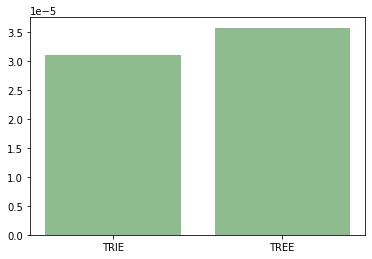

---
text: aabbabd
trie building time: 1.9550323486328125e-05
tree building time: 2.0265579223632812e-05



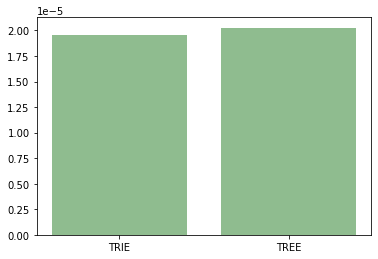

---
text: ababcd
trie building time: 1.7881393432617188e-05
tree building time: 1.8358230590820312e-05



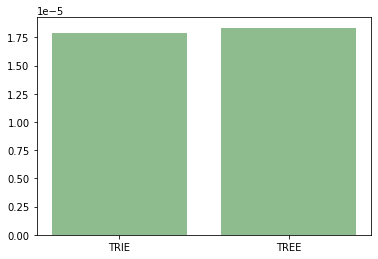

---
text: abcabccd
trie building time: 3.0517578125e-05
tree building time: 3.0040740966796875e-05



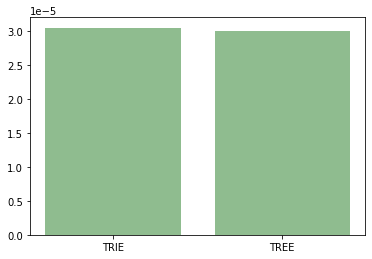

---
text: Dz.U. z 1998 r. (...)
trie building time: 5.480729341506958
tree building time: 0.04722189903259277



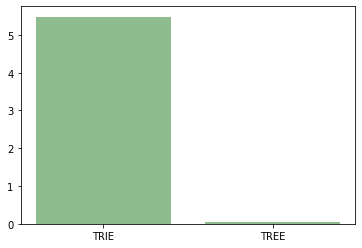

---


In [295]:
for text in test_data:
    text_excerpt = text if len(text) < 20 else text[:20].strip() + ' (...)'
    print(f'text: {text_excerpt}')
    compare_times(text)
    print('---')

Dla krótkich łańcuchów znaków czas potrzebny do budowy struktur był porównywalny. Dla długiego tekstu, znacznie szybszy okazał się algorytm tworzenia drzewa sufiksowego, lecz obie implementacje mają złożoność O(n^2).

## Wnioski
 - Struktury Trie oraz Drzewa Sufiksów pozwalają na odnalezienie wystąpienia wzorca w tekście w czasie proporcjonalnym do długości wzorca.
 - Czas potrzebny do budowy struktur zależy od implementacji. Naiwne podejście daje złożoność O(n^2), która sprawdza się dla krótkich tekstów, jednak istnieją algorytmy liniowe.

Marcin Hawryluk, 06.04.2021